In [1]:
  
import teradata
import pandas as pd
import matplotlib.pyplot as plt
host,user,pwd ='10.132.4.11','Dummy', "Dummy@123"
udaExec =teradata.UdaExec (appName="HelloWorld", version="1.0",logConsole=False)
with udaExec.connect(method="ODBC", system=host,username=user,password=pwd) as session:
    query1 = '''sel * FROM DD_RO_ADHOC.MERCHANT_RECOM_Rating'''#  sample 1000000
    Data = pd.read_sql(query1,session) 
Data.shape

Traceback (most recent call last):
  File "<ipython-input-1-722a3c9788bd>", line 9, in <module>
    Data = pd.read_sql(query1,session)
  File "C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\io\sql.py", line 381, in read_sql
    chunksize=chunksize)
  File "C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\io\sql.py", line 1444, in read_query
    data = self._fetchall_as_list(cursor)
  File "C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\io\sql.py", line 1453, in _fetchall_as_list
    result = cur.fetchall()
  File "C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\teradata\udaexec.py", line 836, in fetchall
    return self.cursor.fetchall()
  File "C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\teradata\util.py", line 139, in fetchall
    for row in self:
  File "C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\teradata\util.py", line 163, in __next

Traceback (most recent call last):
  File "<ipython-input-1-722a3c9788bd>", line 9, in <module>
    Data = pd.read_sql(query1,session)
  File "C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\io\sql.py", line 381, in read_sql
    chunksize=chunksize)
  File "C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\io\sql.py", line 1444, in read_query
    data = self._fetchall_as_list(cursor)
  File "C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\io\sql.py", line 1453, in _fetchall_as_list
    result = cur.fetchall()
  File "C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\teradata\udaexec.py", line 836, in fetchall
    return self.cursor.fetchall()
  File "C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\teradata\util.py", line 139, in fetchall
    for row in self:
  File "C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\teradata\util.py", line 163, in __next

TypeError: must be str, not list

In [ ]:
#Data.to_excel('C:\\Users\\tvimal\\Desktop\\MERCHANT_Data.xlsx')

In [2]:
#TRANSACTION DATA 
data=pd.read_excel('C:\\Users\\tvimal\\Desktop\\MERCHANT_Data.xlsx')
Data=data[['MASK_ID','MERCHANT_NAME','Score']]
Data.head()

,MASK_ID,MERCHANT_NAME,Score
0,11748807,LOH GUAN LYE SPECIALISTS PENANG,14.5
1,848666,COSWAY,12.5
2,13758153,CMSB,13.5
3,12875998,COSWAY,13.0
4,13630440,NEP,10.0


In [3]:
# NO OF MERCHANTS USED PER CUSTOMER
Count= Data.groupby('MASK_ID').agg({'MERCHANT_NAME': ', '.join})
Count['Merchant_count']=Count['MERCHANT_NAME'].apply(lambda x: len(str(x).split(",")))
Count.head()

,MERCHANT_NAME,Merchant_count
MASK_ID,,
4,"0 , PRUBSN...",2
44,"KNL MARKET , MNG ...",5
67,"H & M-SUNWAY VELOCITY , TANGS ...",9
71,"MPH BOOKSTORES , ICHIBA...",2
122,"ERAMAN , CITY C...",2


In [4]:
#PERCENTAGE OF CUSTOMERS
import numpy as np
mapp=Count.groupby('Merchant_count').count()#.hist()
mapp['%']=np.round(mapp['MERCHANT_NAME']/mapp['MERCHANT_NAME'].sum(),2)
mapp.head()

,MERCHANT_NAME,%
Merchant_count,,
1,83632,0.33
2,51265,0.20
3,33346,0.13
4,23003,0.09
5,16419,0.06


# LONG TAIL PLOT

#TO REMOVE THE MOST USED COMMON MERCHANTS AMONG THE CUSTOMERS

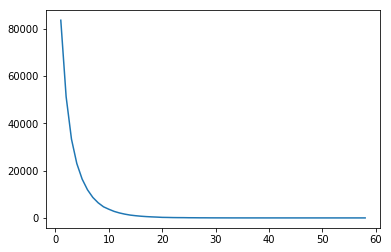

In [5]:
x=list(mapp.index)
y=list(mapp['MERCHANT_NAME'])
plt.plot(x,y)
plt.show()

In [6]:
len(Data.MASK_ID.unique())

254841

In [7]:
import numpy as np
User_id=pd.DataFrame(Data.MASK_ID.unique()).rename(columns={0:'MASK_ID'})
User_id['User_Num'] = np.random.choice(254841, User_id.shape[0],replace=False)
User_id.head()

,MASK_ID,User_Num
0,11748807,63196
1,848666,176584
2,13758153,53343
3,12875998,34830
4,13630440,95333


In [8]:
len(Data.MERCHANT_NAME.unique())

1017

In [9]:
Merchant_Id=pd.DataFrame(Data.MERCHANT_NAME.unique()).rename(columns={0:'MERCHANT_NAME'})
Merchant_Id['Mer_Id'] = np.random.choice(1017, Merchant_Id.shape[0],replace=False)
Merchant_Id.head()

,MERCHANT_NAME,Mer_Id
0,LOH GUAN LYE SPECIALISTS PENANG,403
1,COSWAY,725
2,CMSB,898
3,NEP,999
4,KITSCHEN,552


In [10]:
Rating = pd.merge(Data, User_id[['MASK_ID','User_Num']], on='MASK_ID', how='left') 
Rating_D = pd.merge(Rating, Merchant_Id[['MERCHANT_NAME','Mer_Id']], on='MERCHANT_NAME', how='left') 
Rating_data=Rating_D[['MASK_ID','User_Num','Mer_Id','Score']]
Rating_data.head(10)

,MASK_ID,User_Num,Mer_Id,Score
0,11748807,63196,403,14.5
1,848666,176584,725,12.5
2,13758153,53343,898,13.5
3,12875998,34830,725,13.0
4,13630440,95333,999,10.0
5,3923005,232690,552,12.0
6,2062899,88187,598,12.0
7,60496,211286,974,14.0
8,1173011,70607,297,13.0
9,3742721,238248,849,13.5


In [11]:
n_users = Rating_data.User_Num.unique().shape[0]
n_items = Rating_data.Mer_Id.unique().shape[0]
n_users
#n_items 

254841

In [12]:
## import numpy as np
Data_matrix = np.zeros((n_users, n_items))
for line in Rating_data.itertuples():
    Data_matrix[line[2]-1, line[3]-1] = line[4]
Data_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# ITEM BASED COLLABARATIVE FILTERING

In [13]:
from sklearn.metrics.pairwise import pairwise_distances 
item_similarity = pairwise_distances(Data_matrix.T, metric='cosine')
#user_similarity = pairwise_distances(Data_matrix, metric='cosine')
pd.DataFrame(item_similarity).head()

,0,1,2,3,4,5,6,7,8,9,...,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016
0,0.000000,0.994910,0.995824,0.987195,0.998913,0.996598,0.997040,0.998551,0.985154,0.992990,...,1.000000,0.996589,0.998074,0.994894,0.997444,0.998057,0.996519,0.997038,0.996256,0.995110
1,0.994910,0.000000,0.997674,0.997163,1.000000,0.997777,0.995071,0.998427,0.991035,1.000000,...,0.993082,0.994020,1.000000,0.996673,1.000000,0.913525,1.000000,0.998251,0.997401,0.997373
2,0.995824,0.997674,0.000000,0.994731,0.998758,0.991855,0.997504,1.000000,0.971278,0.993888,...,1.000000,0.986055,1.000000,0.991144,0.998022,1.000000,0.997309,0.987111,1.000000,0.985304
3,0.987195,0.997163,0.994731,0.000000,0.994010,0.982991,0.993967,0.984170,0.960066,0.990696,...,0.993823,0.986138,0.998383,0.986690,0.999379,0.999133,0.996829,0.992089,0.992240,0.986547
4,0.998913,1.000000,0.998758,0.994010,0.000000,1.000000,0.996562,0.993700,0.987426,0.997954,...,1.000000,1.000000,0.998565,0.998365,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
def predict(Rating_data, similarity, type='user'):
    if type == 'user':
        mean_user_rating = Rating_data.mean(axis=1)
        #We use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (Rating_data - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = Rating_data.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [15]:
#user_prediction = predict(data_matrix, user_similarity, type='user')
Item_prediction = predict(Data_matrix, item_similarity, type='item')

In [17]:
print(pd.DataFrame(Item_prediction).shape)
Item_based=pd.DataFrame(Item_prediction)
Item_based

(254841, 1017)


,0,1,2,3,4,5,6,7,8,9,...,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016
0,0.033378,0.033509,0.033474,0.033407,0.033373,0.033452,0.033459,0.033373,0.033302,0.033331,...,0.033438,0.033505,0.033483,0.033396,0.033496,0.033480,0.033516,0.033505,0.033378,0.033365
1,0.025517,0.025602,0.025575,0.025601,0.025441,0.025673,0.025563,0.025649,0.025589,0.025526,...,0.025570,0.025629,0.025544,0.025622,0.025585,0.025570,0.025501,0.025681,0.025587,0.025568
2,0.162707,0.163169,0.162024,0.161116,0.163159,0.160167,0.162511,0.162731,0.158895,0.162895,...,0.163292,0.162576,0.163250,0.162610,0.163058,0.163290,0.162842,0.161524,0.163075,0.161910
3,0.025340,0.025471,0.025485,0.024874,0.025569,0.025417,0.025376,0.025408,0.024792,0.025487,...,0.025548,0.025429,0.025524,0.025401,0.025552,0.025491,0.025142,0.025247,0.025354,0.025283
4,0.099093,0.099387,0.099236,0.098946,0.099483,0.099258,0.099129,0.099446,0.098204,0.099318,...,0.099385,0.099243,0.099306,0.099128,0.099386,0.099350,0.098067,0.099184,0.099433,0.099158
5,0.025064,0.025169,0.025081,0.025009,0.024825,0.025179,0.025021,0.024654,0.025089,0.025094,...,0.025086,0.025134,0.025095,0.024953,0.025043,0.025153,0.025131,0.024967,0.025131,0.025096
6,0.000000,0.013270,0.013288,0.013259,0.013335,0.013309,0.013305,0.013315,0.013299,0.013246,...,0.013306,0.013287,0.013286,0.013285,0.013269,0.013309,0.013286,0.013328,0.013274,0.013300
7,0.036943,0.036887,0.036992,0.036754,0.036939,0.037052,0.036985,0.037002,0.036823,0.036780,...,0.036961,0.037034,0.036912,0.036902,0.036765,0.036974,0.036827,0.036739,0.036298,0.036974
8,0.051619,0.051849,0.051594,0.051708,0.051826,0.051702,0.051649,0.051638,0.051729,0.051548,...,0.051712,0.051804,0.051560,0.051601,0.051480,0.051801,0.051613,0.051522,0.051734,0.051689
9,0.051892,0.052015,0.051821,0.051803,0.052074,0.051984,0.051947,0.051818,0.051131,0.051740,...,0.052080,0.052081,0.051927,0.051691,0.051982,0.052114,0.051979,0.051776,0.052166,0.051856


In [18]:
f_data=Item_based.set_index(Rating_data.MASK_ID.unique())
f_data.head()

,0,1,2,3,4,5,6,7,8,9,...,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016
11748807,0.033378,0.033509,0.033474,0.033407,0.033373,0.033452,0.033459,0.033373,0.033302,0.033331,...,0.033438,0.033505,0.033483,0.033396,0.033496,0.033480,0.033516,0.033505,0.033378,0.033365
848666,0.025517,0.025602,0.025575,0.025601,0.025441,0.025673,0.025563,0.025649,0.025589,0.025526,...,0.025570,0.025629,0.025544,0.025622,0.025585,0.025570,0.025501,0.025681,0.025587,0.025568
13758153,0.162707,0.163169,0.162024,0.161116,0.163159,0.160167,0.162511,0.162731,0.158895,0.162895,...,0.163292,0.162576,0.163250,0.162610,0.163058,0.163290,0.162842,0.161524,0.163075,0.161910
12875998,0.025340,0.025471,0.025485,0.024874,0.025569,0.025417,0.025376,0.025408,0.024792,0.025487,...,0.025548,0.025429,0.025524,0.025401,0.025552,0.025491,0.025142,0.025247,0.025354,0.025283
13630440,0.099093,0.099387,0.099236,0.098946,0.099483,0.099258,0.099129,0.099446,0.098204,0.099318,...,0.099385,0.099243,0.099306,0.099128,0.099386,0.099350,0.098067,0.099184,0.099433,0.099158


In [19]:
new_col=list(Merchant_Id['MERCHANT_NAME'])
f_data.rename(columns=dict(zip(f_data.columns, new_col)),inplace=True)
f_data

,LOH GUAN LYE SPECIALISTS PENANG,COSWAY,CMSB,NEP,KITSCHEN,NIRWANA MAJU,ORIGIN,MPY,LULU SUPERMARKET,MYEG SB PJ,...,EZTAKAFUL,DAH MAKAN,JAYA GROCER SIERRAMA,JPJ ALOR SETAR,TUNE INSURANCE,doTERRA Malaysia,SOCAR MOBILITY MALAYSI,DXN MARKETING SB,PHHP MKTG,AGODA INTERNATION
11748807,0.033378,0.033509,0.033474,0.033407,0.033373,0.033452,0.033459,0.033373,0.033302,0.033331,...,0.033438,0.033505,0.033483,0.033396,0.033496,0.033480,0.033516,0.033505,0.033378,0.033365
848666,0.025517,0.025602,0.025575,0.025601,0.025441,0.025673,0.025563,0.025649,0.025589,0.025526,...,0.025570,0.025629,0.025544,0.025622,0.025585,0.025570,0.025501,0.025681,0.025587,0.025568
13758153,0.162707,0.163169,0.162024,0.161116,0.163159,0.160167,0.162511,0.162731,0.158895,0.162895,...,0.163292,0.162576,0.163250,0.162610,0.163058,0.163290,0.162842,0.161524,0.163075,0.161910
12875998,0.025340,0.025471,0.025485,0.024874,0.025569,0.025417,0.025376,0.025408,0.024792,0.025487,...,0.025548,0.025429,0.025524,0.025401,0.025552,0.025491,0.025142,0.025247,0.025354,0.025283
13630440,0.099093,0.099387,0.099236,0.098946,0.099483,0.099258,0.099129,0.099446,0.098204,0.099318,...,0.099385,0.099243,0.099306,0.099128,0.099386,0.099350,0.098067,0.099184,0.099433,0.099158
3923005,0.025064,0.025169,0.025081,0.025009,0.024825,0.025179,0.025021,0.024654,0.025089,0.025094,...,0.025086,0.025134,0.025095,0.024953,0.025043,0.025153,0.025131,0.024967,0.025131,0.025096
2062899,0.000000,0.013270,0.013288,0.013259,0.013335,0.013309,0.013305,0.013315,0.013299,0.013246,...,0.013306,0.013287,0.013286,0.013285,0.013269,0.013309,0.013286,0.013328,0.013274,0.013300
60496,0.036943,0.036887,0.036992,0.036754,0.036939,0.037052,0.036985,0.037002,0.036823,0.036780,...,0.036961,0.037034,0.036912,0.036902,0.036765,0.036974,0.036827,0.036739,0.036298,0.036974
1173011,0.051619,0.051849,0.051594,0.051708,0.051826,0.051702,0.051649,0.051638,0.051729,0.051548,...,0.051712,0.051804,0.051560,0.051601,0.051480,0.051801,0.051613,0.051522,0.051734,0.051689
3742721,0.051892,0.052015,0.051821,0.051803,0.052074,0.051984,0.051947,0.051818,0.051131,0.051740,...,0.052080,0.052081,0.051927,0.051691,0.051982,0.052114,0.051979,0.051776,0.052166,0.051856


In [20]:
data1=f_data.iloc[:100000,:]
data2=f_data.iloc[100001:,:]
D1=pd.DataFrame(data1.columns[np.argsort(-data1.values, axis=1)], index=data1.index).reset_index()
D2=pd.DataFrame(data2.columns[np.argsort(-data2.values, axis=1)], index=data2.index).reset_index()
Rec_merchants=pd.concat([D1.iloc[:,:30],D2.iloc[:,:30]],axis=0)
Rec_merchants

,index,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
0,11748807,VERN,SYARIKAT TAKAFUL M,ASSUNTA HOSPITAL,PB CARE PA,THAI ODYSSEY,CTX RO AZALI RESOURCE,ARASHI,BIG PHARMACY TAIPAN,PACIFIC HYPER BATU PAHAT BATU PAHAT,...,ECONSAVE PEARL POINT,BATARAS,MAX FASHION,GAMUDA LAND PROPERTY,SING KWONG,TUPPERWARE,PARKWELL,ALEXIS,SKECHERS,CARS
1,848666,CTX RO MOSAT MGMT,JAYA GROCER KIARA,CTX RO TONG LEE,GEGM BHD KL,CTX PP MILLION STATION S BUKIT MERTAJA,GIANT H,SENANGPAY,RESTORAN JIN XUAN,JAYA GROCER,...,MINISO,GEGM BHD,ORIENTAL PAVILION,HEALTHLAND,ATOMY MALAYSIA SB,MADAM KWAN,TOPMAN,GEGI,SUPERSTAR GEMINI,CTX RO HONG AIK
2,13758153,DIN TAI FUNG,BILLION SHOPPING CENTR,TOYOTA SERVICE,CYCLE,TOKIO MARINE INSRNS,BILLION,BJ MTHLY STMT,CTX SC PETROBENA VENTURE PENANG,MCIS UOB,...,BAGAN SPECIALIST CENTRE BUTTERWORTH,PATHLAB HEALTH MANAGE,OBNS TRADING,HOME PRODUCT,CTX RO DENAI PETROLEU,TUNAS MANJA,PADINI CONCEPT ST,VOIR GALLER,AKEMI UCHI,BILLION SHPG
3,12875998,TRIUMPH,MIRRORCLE,PATHLAB HEALTH MANAGE,COURTS,FLYSCOOT,PDI,H & M - 1ST AVENUE,BJ MTHLY STMT,BILLION SHOPPING,...,CTX CO SRI DAMANSARA SS DAMANSARA,HUAWEI,BRANDS OUTLET,ECONSAVE RAJA UDA,MASSIMO DUTTI,ECONSAVE BUTTERWORTH,JAYA GROCER SUBANG EMPIR SUBANG JAYA,CTX SC PETROBENA VENTURE PENANG,TOMEI,ETERNAL CASH SB
4,13630440,LAVENDER CNFCT,CTX PP TEIK SANG,DBKL,GBSN,HOOIT MART SDN BHD,HO MIN SAN,CTX PP DT,SING KWONG,ECONSAVE SLIM RIVER,...,SECURE PARKING CORP,HEALTHLAND,H & M-IOI CITY,PACIFIC HYPER BATU PAH,EGHL,ECONSAVE KLANG PARADE,TWO L FASHION,TOYOTA SERVICE,MIRRORCLE,MNG BOUTIQUE
5,3923005,KK SUPERMART,TELEKOM MALAYSIA BERHA,SKECHER,ICHIBAN RAMEN,TONG DEPARTMENTAL,CTX RO RAZQ MERDEKA,SKECHERS,PS BDR TUN HUSSEIN ONN,FARLEY MINI MARKET,...,KINOKUNIYA,FIREFLY,COMMON SENSE,MAX FASHION,H & M-JB CITY SQ,HOMETOWN HAINAN COFFEE,NIRWANA MAJU,CTX RO AZALI RESOURCE,TUPPERWARE,IPOH SPECIALIST HOSPITAL IPOH
6,2062899,ORIENTAL PAVILION,AMG,CTX CO CAA,2C2P-JOMPARKING,BANANG MTHLY STMT,CELEBRITY,ISETAN THE JPN STR,VERN,NHBKL SBMC,...,CTX RO MOSAT MGMT,MFM,NV ALLIANCE,SERVAY H,MYDIN HYPERMARKET PENANG BAYAN LEPAS,BILLION SHOPPING CENTRE PARIT BUNTAR,PB CARE PA,HOSPITAL UK,DMMS,MY PHARMACY
7,60496,KK SUPERMART,ORIENTAL PAVILION,CHARLES,MACHINES,MPI,MST GOLF,CTX RO RAZQ MERDEKA,SYARIKAT TAKAFUL M,OTWC,...,FIREFLY,NIRWANA MAJU,PADINI CONCEPT,CTX PP MILLION STATION S BUKIT MERTAJA,EGHL,CTX RO AZALI RESOURCE,KAISON,SKECHERS,ECONSAVE B,TONY ROMA
8,1173011,KK SUPERMART,ORIENTAL PAVILION,PENANG SWIMMING CLUB,CTX RO RAZQ MERDEKA,CTX RO AZALI RESOURCE,CARS,TONG DEPARTMENTAL,CTX RO RIA AZIMAT,JAYA GROCER SUBANG EMP,...,CHARLES,NV ALLIANCE,SHOJIKIYA,JAYA GROCER THE GARDENS KUALA LUMPUR,SOUPER TANG,H & M-SKY AVENUE,ASTERSPRING,KAISON,MEPS,FS FAMILY STORE
9,3742721,FISH,PARKWELL,EXTRA EXCEL,TONG DEPARTMENTAL,H & M - LOT 10,ERAMAN RETAIL,CTX CO MUZA STAR,CTX SC S H LEE ENTERPRIS SELANGOR,GLOBAL HEALTH UNIQUE,...,THE BREW HOUSE,THE BREW HOUSE EKO CHERA KUALA LUMPUR,H&M-1 UTAMA,THE BODYSHOP,HEALTH LANE F P,COMMON SENSE,PHHP MKTG,JAYA GROCER THE GARDENS KUALA LUMPUR,SAJ RANHILL,SECRET RECIPE


In [30]:
Recomended_Mer=Rec_merchants.iloc[:,:5]
Recomended_Mer=Recomended_Mer.rename(columns={'index':'MASK_ID'})
Recomended_Mer.head()

,MASK_ID,0,1,2,3
0,11748807,VERN,SYARIKAT TAKAFUL M,ASSUNTA HOSPITAL,PB CARE PA
1,848666,CTX RO MOSAT MGMT,JAYA GROCER KIARA,CTX RO TONG LEE,GEGM BHD KL
2,13758153,DIN TAI FUNG,BILLION SHOPPING CENTR,TOYOTA SERVICE,CYCLE
3,12875998,TRIUMPH,MIRRORCLE,PATHLAB HEALTH MANAGE,COURTS
4,13630440,LAVENDER CNFCT,CTX PP TEIK SANG,DBKL,GBSN


# MERCHANT Evaluation

In [32]:
Recomended_Mer['MASK_ID']=Recomended_Mer['MASK_ID'].astype(int)
Rec_obj = Recomended_Mer.select_dtypes(['object'])
Recomended_Mer[Rec_obj.columns] = Rec_obj.apply(lambda x: x.str.strip())
Recomended_Mer.head()

,MASK_ID,0,1,2,3
0,11748807,VERN,SYARIKAT TAKAFUL M,ASSUNTA HOSPITAL,PB CARE PA
1,848666,CTX RO MOSAT MGMT,JAYA GROCER KIARA,CTX RO TONG LEE,GEGM BHD KL
2,13758153,DIN TAI FUNG,BILLION SHOPPING CENTR,TOYOTA SERVICE,CYCLE
3,12875998,TRIUMPH,MIRRORCLE,PATHLAB HEALTH MANAGE,COURTS
4,13630440,LAVENDER CNFCT,CTX PP TEIK SANG,DBKL,GBSN


In [35]:
result = pd.merge(Recomended_Mer,Count, on='MASK_ID', how='left') 
result=result.rename(columns={0:'Rec_Mer1',1:'Rec_Mer2',2:'Rec_Mer3','MERCHANT_NAME':'Used_Merchants'})
Result=result[['MASK_ID', 'Used_Merchants', 'Rec_Mer1' ,'Rec_Mer2' ,'Rec_Mer3']]
Result.head(10)

,MASK_ID,Used_Merchants,Rec_Mer1,Rec_Mer2,Rec_Mer3
0,11748807,"LOH GUAN LYE SPECIALISTS PENANG , ISLAND...",VERN,SYARIKAT TAKAFUL M,ASSUNTA HOSPITAL
1,848666,COSWAY,CTX RO MOSAT MGMT,JAYA GROCER KIARA,CTX RO TONG LEE
2,13758153,CMSB,DIN TAI FUNG,BILLION SHOPPING CENTR,TOYOTA SERVICE
3,12875998,"COSWAY , AMWAY ...",TRIUMPH,MIRRORCLE,PATHLAB HEALTH MANAGE
4,13630440,"NEP , NEP DI...",LAVENDER CNFCT,CTX PP TEIK SANG,DBKL
5,3923005,KITSCHEN,KK SUPERMART,TELEKOM MALAYSIA BERHA,SKECHER
6,2062899,NIRWANA MAJU,ORIENTAL PAVILION,AMG,CTX CO CAA
7,60496,"ORIGIN , TMB ...",KK SUPERMART,ORIENTAL PAVILION,CHARLES
8,1173011,MPY,KK SUPERMART,ORIENTAL PAVILION,PENANG SWIMMING CLUB
9,3742721,"LULU SUPERMARKET , COWAY ...",FISH,PARKWELL,EXTRA EXCEL


In [36]:
#Data['Mer']=[ i.rstrip() for i in Data['MERCHANT_NAME']]
#dfs= Data.groupby('ID').agg({'Mer': ', '.join}).reset_index()

In [37]:
Result.to_excel('C:\\Users\\tvimal\\Desktop\\GEO_LOCATION_MODEL\\Recommended_Merchants_data.xlsx')